# Impacts of Landuse on Water Flow Peaks
by Martha Burket, Carson DeSotel  
GEOG 5543  
Fall 2021

In [1]:
'''
    Installation:
'''
import sys
from IPython.utils import io

print('Installing Needed Libraries...')
with io.capture_output() as captured:
    !{sys.executable} -m pip install matplotlib
    !{sys.executable} -m pip install requests
    !{sys.executable} -m pip install tensorflow
    !{sys.executable} -m pip install keras
    !{sys.executable} -m pip install sklearn
print('Finished Installation...')

Installing Needed Libraries...
Finished Installation...


In [2]:
'''
    Imports:
'''
### Standard Data Processing Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### SKLearn Imports
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

### Keras Imports
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [50]:
'''
    Open Saved Data & Validate
'''
final_data = pd.read_csv('final_data_extra_processing.csv')

### Convert Dates column to DateTime type
final_data['Dates'] = pd.to_datetime(final_data['Dates'], utc = True)
final_data.head(5)

,Dates,Temp (F),RH (%),Wind Spd (mph),Precip (in),Flow (ft^3 / s),Sample Flow,24hr Precip
0,2012-04-02 11:00:00+00:00,62,47,28,0.0,68.0,71.9,0.0
1,2012-04-02 12:00:00+00:00,67,47,24,0.0,65.4,71.9,0.0
2,2012-04-02 13:00:00+00:00,69,47,24,0.0,65.4,71.9,0.0
3,2012-04-02 14:00:00+00:00,69,48,23,0.0,66.7,71.9,0.0
4,2012-04-02 15:00:00+00:00,69,50,18,0.0,66.7,71.9,0.0


In [51]:
'''
    Normalize Values:
    DO NOT RUN MORE THAN ONCE
'''

### Normalize RH by dividing by 100 to fit in range [0, 1]
final_data['RH (%)'] = final_data['RH (%)'].apply(lambda x: x / 100)

### Normalize Temp 
final_data['Temp (F)'] = final_data['Temp (F)'].apply(lambda x: x / 100)

### Normalize Precipitation
precip_max = final_data['Precip (in)'].max()
final_data['Precip (in)'] = final_data['Precip (in)'].apply(lambda x: x / precip_max)

### Normalize 24 hr cumulative precipitation
cuma_precip_max = final_data['24hr Precip'].max()
final_data['24hr Precip'] = final_data['24hr Precip'].apply(lambda x: x / cuma_precip_max)

### Normalize Wind Speed
wind_max = final_data['Wind Spd (mph)'].max()
final_data['Wind Spd (mph)'] = final_data['Wind Spd (mph)'].apply(lambda x: x / wind_max)

### Normalize Flow using Min-Max Normalization
flow_max = final_data['Flow (ft^3 / s)'].max()
flow_min = final_data['Flow (ft^3 / s)'].min()

final_data['Flow (ft^3 / s)'] = final_data['Flow (ft^3 / s)'].apply(lambda x: (x - flow_min) / (flow_max - flow_min))

### Normalize Sample flow using Min-Max normalization
final_data['Sample Flow'] = final_data['Sample Flow'].apply(lambda x: (x - flow_min) / (flow_max - flow_min))

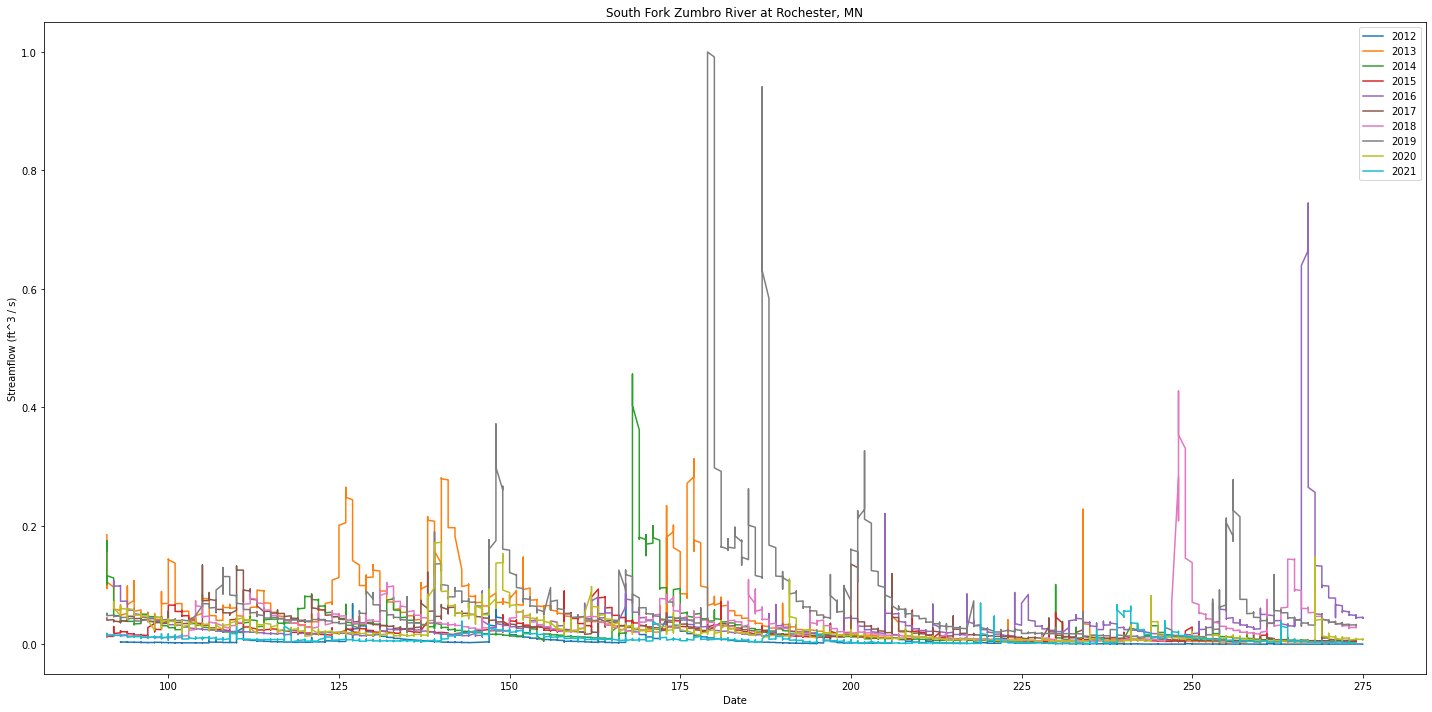

In [52]:
'''
    Plot Normalized Flow
'''

df_arr = []

year = 2012
### Split DF by years
while year < 2022:
    df_arr.append(final_data[final_data['Dates'].dt.year == year].copy(deep = True))
    year += 1

plt.figure(figsize=(20, 10))
plt.title('South Fork Zumbro River at Rochester, MN')
plt.xlabel('Date')
plt.ylabel('Streamflow (ft^3 / s)')

index = 0
for df in df_arr:
    ### Remove Year From Datetime 'Dates' Column
    df['DayOfYear'] = df['Dates'].dt.dayofyear
    
    ### Plot Each DataFrame
    plt.plot(df['DayOfYear'], df['Flow (ft^3 / s)'], label=str(2012 + index))
    
    index += 1

plt.tight_layout()
plt.legend()
plt.show()


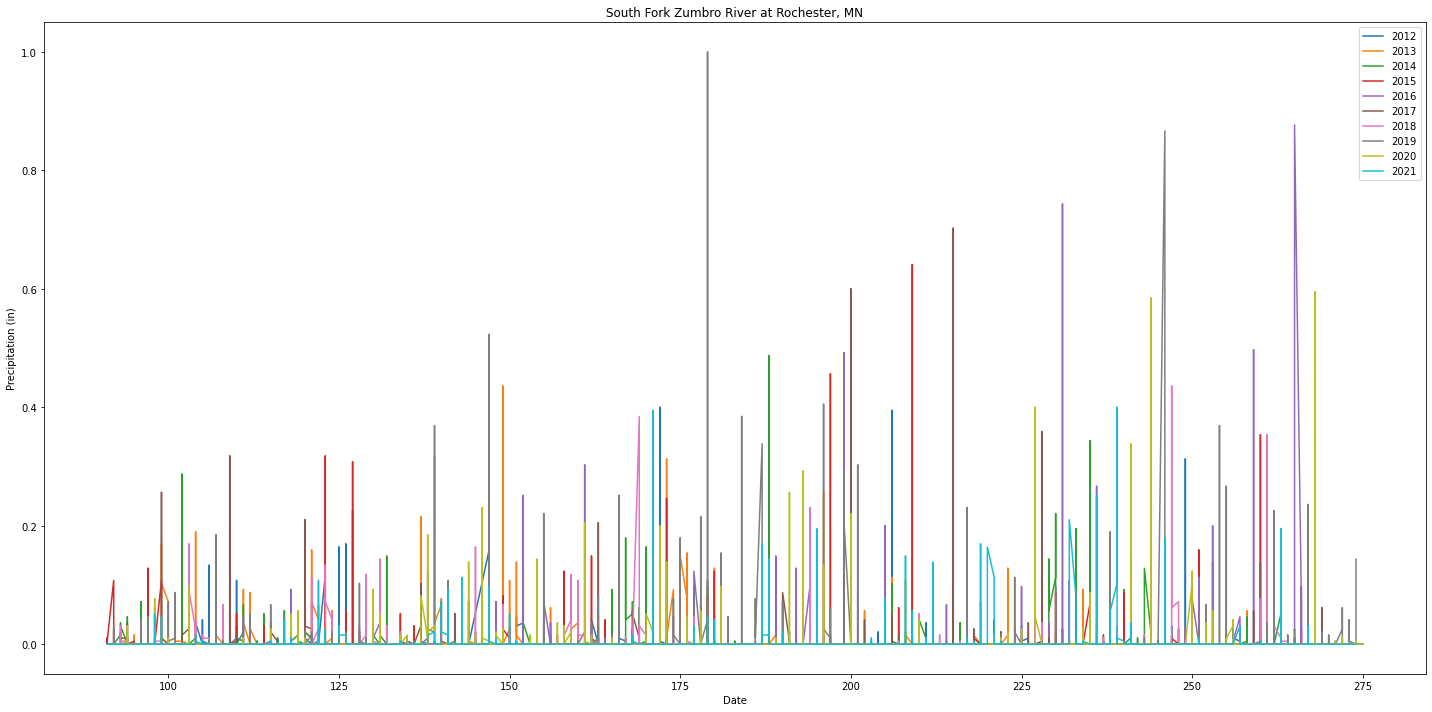

In [53]:
'''
    Display Precipitation
'''
df_arr = []

year = 2012
### Split DF by years
while year < 2022:
    df_arr.append(final_data[final_data['Dates'].dt.year == year].copy(deep = True))
    year += 1

plt.figure(figsize=(20, 10))
plt.title('South Fork Zumbro River at Rochester, MN')
plt.xlabel('Date')
plt.ylabel('Precipitation (in)')

index = 0
for df in df_arr:
    ### Remove Year From Datetime 'Dates' Column'Precip (in)'
    df['DayOfYear'] = df['Dates'].dt.dayofyear
    
    ### Plot Each DataFrame
    plt.plot(df['DayOfYear'], df['Precip (in)'], label=str(2012 + index))    
    index += 1

plt.tight_layout()
plt.legend()
plt.show()

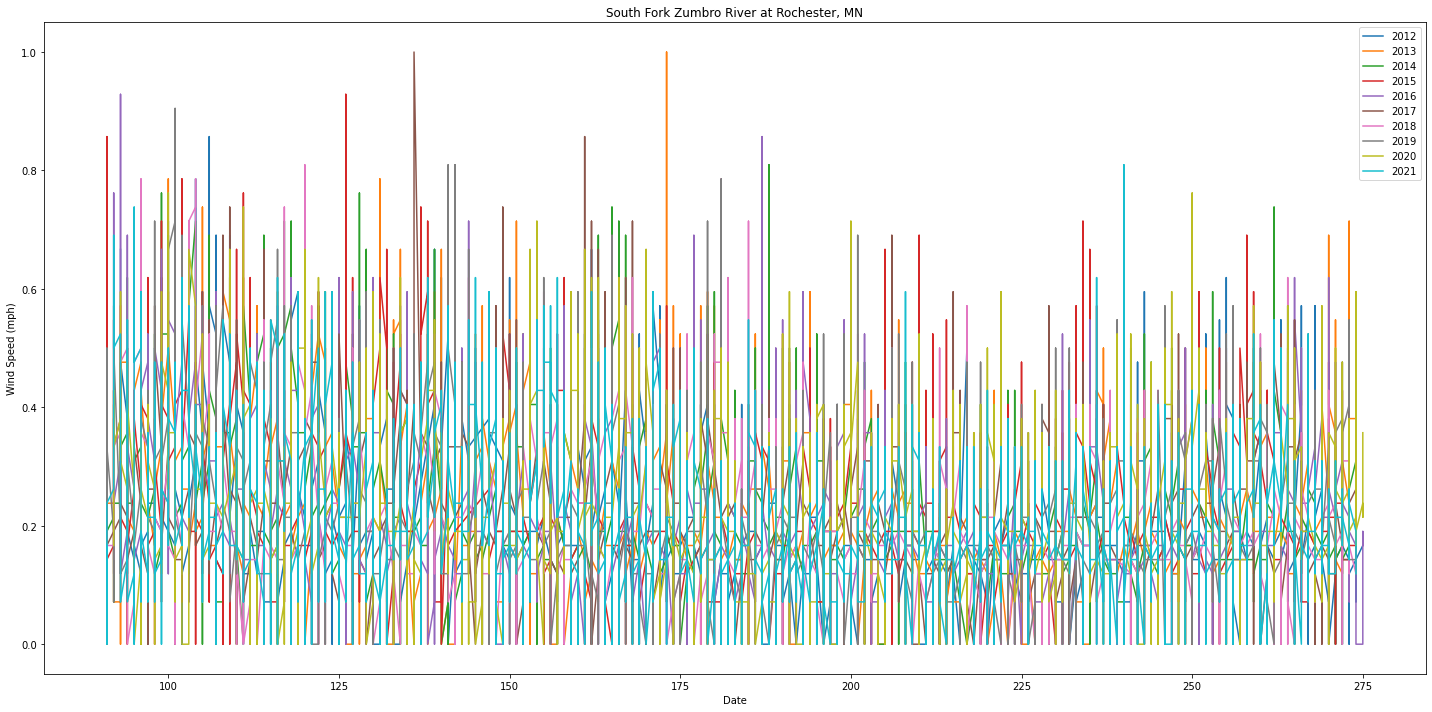

In [54]:
'''
    Display Normalized Wind Speed
'''
df_arr = []

year = 2012
### Split DF by years
while year < 2022:
    df_arr.append(final_data[final_data['Dates'].dt.year == year].copy(deep = True))
    year += 1

plt.figure(figsize=(20, 10))
plt.title('South Fork Zumbro River at Rochester, MN')
plt.xlabel('Date')
plt.ylabel('Wind Speed (mph)')

index = 0
for df in df_arr:
    ### Remove Year From Datetime 'Dates' Column
    df['DayOfYear'] = df['Dates'].dt.dayofyear
    
    ### Plot Each DataFrame
    plt.plot(df['DayOfYear'], df['Wind Spd (mph)'], label=str(2012 + index))
    index += 1

plt.tight_layout()
plt.legend()
plt.show()

In [55]:
# add day of year to final data frame
final_data['DayOfYear'] = final_data['Dates'].dt.dayofyear

# normalize
final_data['DayOfYear'] = final_data['DayOfYear']/366

In [59]:
# final check on data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
     print(final_data[:5000])

                         Dates  Temp (F)  RH (%)  Wind Spd (mph)  Precip (in)  \
0    2012-04-02 11:00:00+00:00      0.62    0.47        0.666667     0.000000   
1    2012-04-02 12:00:00+00:00      0.67    0.47        0.571429     0.000000   
2    2012-04-02 13:00:00+00:00      0.69    0.47        0.571429     0.000000   
3    2012-04-02 14:00:00+00:00      0.69    0.48        0.547619     0.000000   
4    2012-04-02 15:00:00+00:00      0.69    0.50        0.428571     0.000000   
5    2012-04-02 16:00:00+00:00      0.71    0.50        0.380952     0.000000   
6    2012-04-02 17:00:00+00:00      0.69    0.54        0.500000     0.000000   
7    2012-04-02 18:00:00+00:00      0.67    0.58        0.261905     0.000000   
8    2012-04-02 19:00:00+00:00      0.62    0.67        0.238095     0.000000   
9    2012-04-02 20:00:00+00:00      0.61    0.67        0.309524     0.000000   
10   2012-04-02 21:00:00+00:00      0.60    0.66        0.261905     0.000000   
11   2012-04-02 22:00:00+00:

### Machine Learning

In [60]:
'''
    Define a function to reshape the data to fit with Keras' LSTM module
    Source: https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
'''
def series_to_supervised(df, n_in=1, n_out=1,dropnan=True):
    '''
        convert a data frame to an appropriate data format for Keras
        :param df: a pandas DataFrame to process
        :param n_in: the number of input series
        :param n_out: the number of output series
        :param dropnan: (T/F) whether to drop NaN values
        :return: a new DataFrame that has been fit with appropriate data
    '''
    n_vars = len(df.columns)
    cols, names = list(), list()
    
    ### move range of inputs to define an input sequence (t - n_in .. t - 1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        ### Set column names based on shift
        names += [('%s (t-%d)' % (df.columns[j], i)) for j in range(n_vars)]
        
    ### move range of inputs to define a forecase sequence (t .. t + n_out)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        
        ### Set column names based on shift
        if i == 0:
            names += [('%s (t)' % (df.columns[j])) for j in range(n_vars)]
        else:
            names += [('%s (t+%d)' % (df.columns[j], i)) for j in range(n_vars)]
    
    ### join names w/ cols
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    ### delete discontinuous rows of data - THIS WILL NOT WORK WHEN n_hours > 1
    agg['DayDiff'] = agg['DayOfYear (t-1)'].diff()
    agg = agg[abs(agg['DayDiff']) <= 1/366]        # only keep continuous dates
    agg.drop(columns=['DayDiff'],inplace=True) # remove DayDiff

    ### drop any NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

In [64]:
'''
    Process input data to fit with model
'''
final_data.set_index(final_data['Dates'])

### remove Dates from input
input_set = final_data.loc[:, 'Temp (F)':'DayOfYear']

#n_hours = 3
n_features = 5

### fit input_set to model
reframed = series_to_supervised(input_set,1,1)

### remove unwanted columns
#reframed.drop(reframed.columns[[4,6,7,8,9,11]], axis=1, inplace=True) # n_hours = 1
#reframed.drop(reframed.columns[[4,5,10,11,16,17,18,19,20,21,23]], axis=1, inplace=True)
#reframed.drop(reframed.columns[[4,7,8,9,10,12,13]], axis=1, inplace=True) # with sample data, n hours = 1
reframed.drop(reframed.columns[[4,8,9,10,11,13,14,15]], axis=1, inplace=True) # with sample data + cumalitve precip, n hours = 1

print(reframed.head())  # show result

   Temp (F) (t-1)  RH (%) (t-1)  Wind Spd (mph) (t-1)  Precip (in) (t-1)  \
2            0.67          0.47              0.571429                0.0   
3            0.69          0.47              0.571429                0.0   
4            0.69          0.48              0.547619                0.0   
5            0.69          0.50              0.428571                0.0   
6            0.71          0.50              0.380952                0.0   

   Sample Flow (t-1)  24hr Precip (t-1)  DayOfYear (t-1)  Flow (ft^3 / s) (t)  
2           0.004042                0.0         0.254098             0.003494  
3           0.004042                0.0         0.254098             0.003604  
4           0.004042                0.0         0.254098             0.003604  
5           0.004042                0.0         0.254098             0.003604  
6           0.004042                0.0         0.254098             0.003713  


In [66]:
'''
    Define Training & Testing Data Sets
    
    Removes discontinuities where the stream gauge was out of commission
'''
values = reframed.values

### Get locations of turnover points in the data set -- goes to a new year
### note that there are a few full days of missing data - stream gauge out of commission
reframed['DayDiff'] = reframed['DayOfYear (t-1)'].diff()
yr_idx = reframed.index[abs(reframed['DayDiff'])>30/366].tolist()
split_idx = yr_idx[6] # where to split the training/validation data

### split into training and validation data
reframed.drop(columns=['DayDiff'],inplace=True)
train = values[:split_idx,:]
test = values[split_idx:,:]

### get input and prediction datasets
# NB: the indexing here needs to be adjusted to pull out the streamflow data!!
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

### reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
print(train_y)

(30230, 1, 7) (30230,) (11318, 1, 7) (11318,)
[0.00349441 0.00360388 0.00360388 ... 0.06526553 0.06560234 0.06484452]


In [67]:
'''
    Create the model
'''
n_epochs = 50

### design the model
model = Sequential()
model.add(LSTM(n_epochs, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam') # can change loss & optimizer

### run model for n_epochs
print('Running', n_epochs, 'tests...')
with io.capture_output() as captured:
    history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print('Finished running tests...')

Running 50 tests...
Finished running tests...


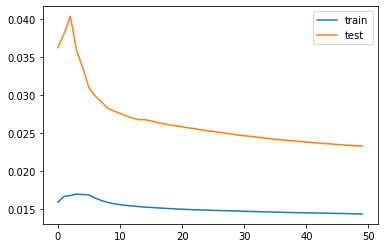

In [68]:
### plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

30230
41548


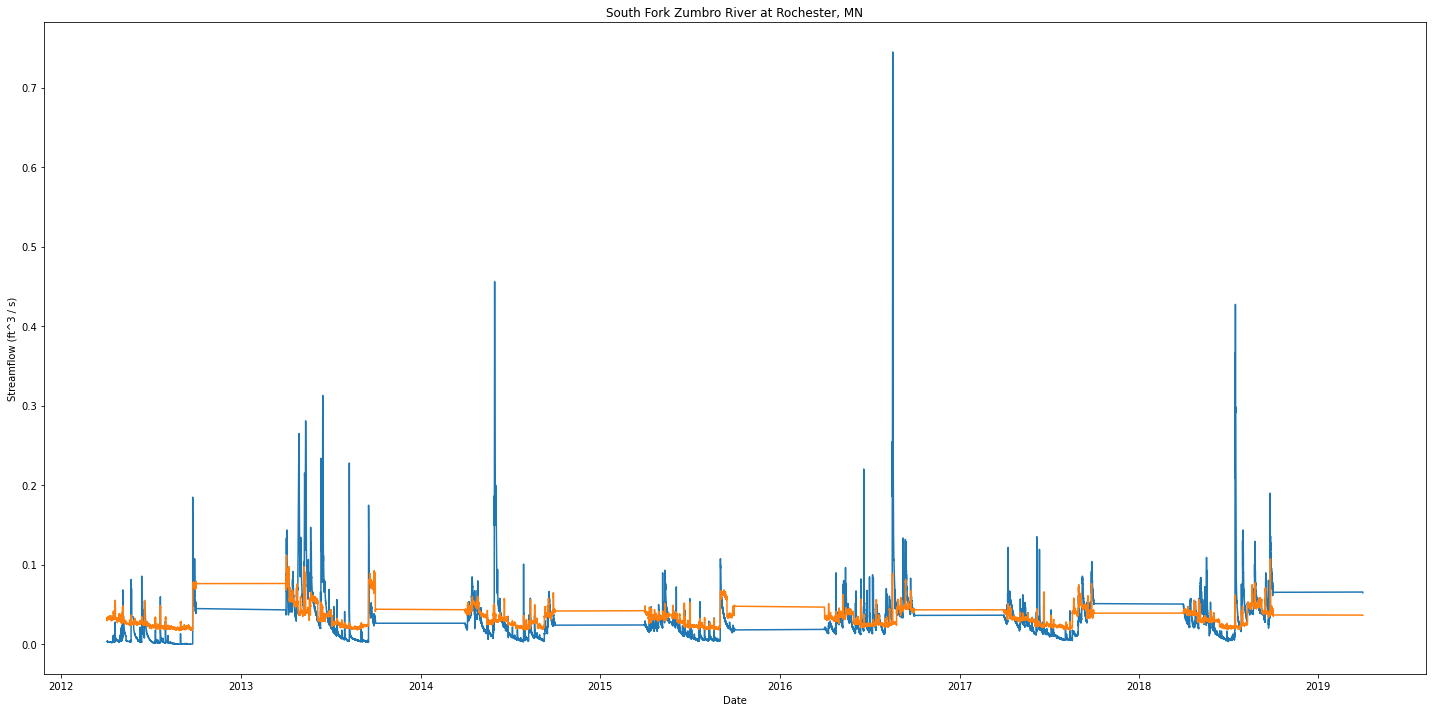

In [69]:
'''
    Visualize
'''
import numpy as np
yhat = model.predict(train_X, verbose=0)
yhat = np.concatenate(yhat, axis=0)
yhat = pd.Series(yhat)
print(len(yhat))
#print(len(reframed_with_dates['Dates (t-1)']))
print(len(reframed))

prediction_dict = {'Dates':final_data['Dates'], 'Streamflow (ft^3/s)':yhat}

prediction = pd.DataFrame(prediction_dict)
prediction.dropna(inplace = True)
plt.figure(figsize=(20, 10))
plt.title('South Fork Zumbro River at Rochester, MN')
plt.xlabel('Date')
plt.ylabel('Streamflow (ft^3 / s)')
plt.plot(prediction['Dates'],train_y)
plt.plot(prediction['Dates'], prediction['Streamflow (ft^3/s)'])

plt.tight_layout()
plt.show()

### References
[1] https://www.earthdatascience.org/tutorials/acquire-and-visualize-usgs-hydrology-data/  
[2] https://waterservices.usgs.gov/rest/IV-Service.html  
[3] https://www.ogc.org/standards/waterml  
[4] https://docs.python-requests.org/en/latest/user/quickstart/  
[5] https://www.usgs.gov/special-topic/water-science-school/science/how-streamflow-measured?qt-science_center_objects=0#qt-science_center_objects  
[6] https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/